# Computer Assignment 2

## Student names and student numbers:
- Theo Koenig (4922301)
- Tip ten Brink (4927192)

**General TA feedback:**

## === Section 1 : The Saha Equation ===

In [1]:
from IPython.display import display, Math, Latex

### Exercise 1

**Grade: x/8**

**TA Feedback:**

$$\require{mhchem}$$
We know that at equilibrium:
$0 = dG = \sum_i{\mu_idN_i}$

Therefore we find that for an equilibrium equation of a single hydrogen atom to a single electron and proton, the chemical potentials, $\mu_{i}$, must be balanced as such:
$\mu_{H} = \mu_{e^-}+\mu_{p}$

Then, using the chemical potential of an ideal gas mixture we find
\begin{equation}
-k_B T \left( \ln{\frac{1}{n_H} \left( \frac{2\pi m_H k_B T}{h^2} \right) ^{3/2}} \right) - I = -k_{B}T \left( \ln{\frac{1}{n_e} \left( \frac{2\pi m_e k_B T}{h^2} \right)} ^{3/2} \right) -k_{B}T \left( \ln{\frac{1}{n_p} \left( \frac{2\pi m_p k_B T}{h^2} \right) ^{3/2}} \right).
\end{equation}

This can be simplified to:
\begin{equation}
\ln \left( {\frac{1}{n_H} \left( \frac{2 \pi m_H k_B T}{h^2} \right) ^{3/2} n_e \left( \frac{2 \pi m_e k_B T}{h^2} \right) ^{-3/2} n_p  \left( \frac{2 \pi m_p k_B T}{h^2} \right) ^{-3/2}} \right) = -\frac{I}{k_B T}
\end{equation}

Taking $m_H = m_p$ and given $\frac{n_e n_p}{n_H} = \frac{n_e^2}{n_H}$, we then find
\begin{equation}
\ln{\frac{n_e^2}{n_H} \left( \frac{h^2}{2 \pi m_e k_B T} \right) ^{3/2}} = -\frac{I}{k_B T}.
\end{equation}

From which it follows

\begin{equation}
\frac{n_e^2}{n_H} = \left( \frac{2 \pi m_e k_B T}{h^2} \right)^{3/2} \cdot e^{\frac{-I}{k_B T}}.
\end{equation}

Given that $\gamma = \frac{\hbar^2}{2m_e}$, we then finally obtain

\begin{equation}
\frac{n_e^2}{n_H} = \left( 2 \pi \gamma k_B T \right)^{3/2} \cdot e^{\frac{-I}{k_B T}}.
\end{equation}


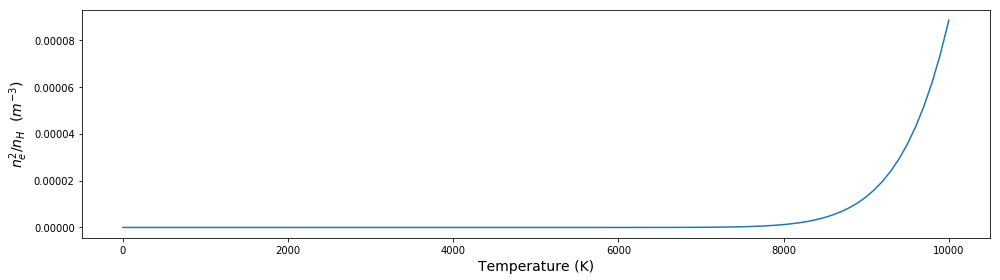

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Constants used
pi = np.pi
a0 = 0.529 # Angstrom
hbar2_d_2me = 13.6 # eV a0^2
gamma = hbar2_d_2me
k_B = 8.617e-5 # eV K^-1 Boltzmann constant
I = 13.6 # eV ionization potential of the hydrogen atom

T_start = 0.01 # start at zero results in a divide_by_zero_error
T_end = 10000
T_step = 100
T = np.arange(T_start, T_end+1, T_step)

ne2_d_nH = (2*pi*gamma*k_B*T)**(3/2)*np.exp(-I/(k_B*T))

plt, ax = plt.subplots(figsize=(14,4))
ax.plot(T, ne2_d_nH)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel(r'$n_e^2/n_H$ '+' $(m^{-3})$', fontsize=14) #Missing units
plt.tight_layout()

Explain why using these units makes sense

### Exercise 2

**Grade: x/9**

**TA Feedback:**

Given the ionization fractions as

\begin{equation}
\zeta = \frac{n_p}{n_p + n_H}
\end{equation}

The derivation of 

\begin{equation}
\frac{\zeta^2}{1-\zeta}  = f(T)
\end{equation}

with 

\begin{equation}
f(T) = \frac{1}{n_0}\left( \frac{2 \pi m_e k_B T}{h^2} \right)^{3/2} \cdot e^{\frac{-I}{k_B T}} = \frac{n_e^2}{n_H},
\end{equation}

where $n_0 = n_p + n_H$, is given as follows:

\begin{equation}
\frac{\zeta^2}{1-\zeta}  = \left( \frac{n_p}{n_p + n_H} \right)^2 \left( \frac{1}{1 - \frac{n_p}{n_p + n_H}} \right) = \frac{n_p^2}{(n_p + n_H)^2 - (n_p + n_H)n_p} = \frac{n_p^2}{n_H(n_p + n_H)} = \frac{1}{n_0}\frac{n_p^2}{n_H} = \frac{1}{n_0}\frac{n_e^2}{n_H} = \frac{1}{n_0}f(T)
\end{equation}

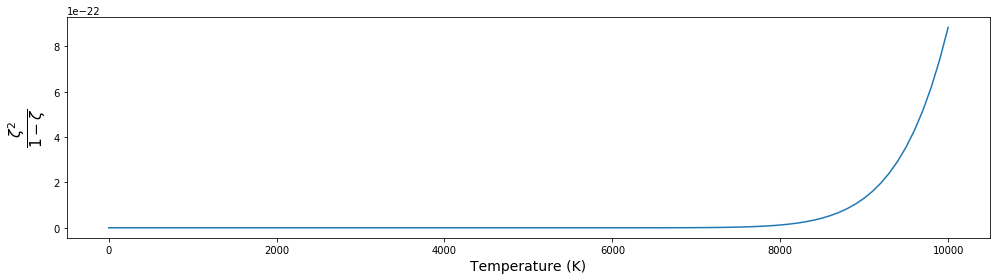

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# constants
n0 = 1e17 #m^-3

zeta = (1/n0)*ne2_d_nH

plt, ax = plt.subplots(figsize=(14,4))
ax.plot(T, zeta)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel(r'$\frac{\zeta^2}{1-\zeta}$', fontsize=22) #No units
plt.tight_layout()

### Exercise 3

**Grade: x/4**

**TA Feedback:**

The temperature at which $\zeta < 0.01$ is first crossed indicates the temperature where the vast majority of protons had formed hydrogen atoms. This temperature can simply be found at the point where $\frac{\zeta^2}{1-\zeta} = 1.01\bar{01}\times 10^{-4}$. 

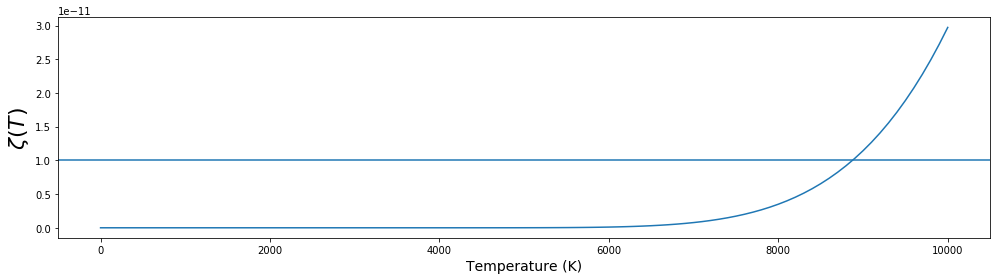

In [59]:
import matplotlib.pyplot as plt

#for zeta << 1 we can approximate zeta(T) to be:
zeta = np.sqrt((1/n0)*ne2_d_nH)

plt, ax = plt.subplots(figsize=(14,4))
ax.plot(T, zeta)
ax.axhline(1e-11, 0, 10000)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel(r'$\zeta(T)$', fontsize=22) #No units
plt.tight_layout()

Your explanation

### Exercise 4

**Grade: x/8**

**TA Feedback:**

Your explanation

In [5]:
#Put your code here

Your explanation

## === Section 2 : Car Battery ===

### Exercise 5

**Grade: x/6**

**TA Feedback:**

Your explanation

In [6]:
#Put your code here

Your explanation

### Exercise 6

**Grade: x/8**

**TA Feedback:**

Your explanation

In [7]:
#Put your code here

Your explanation

### Exercise 7

**Grade: x/8**

**TA Feedback:**

Your explanation

In [8]:
#Put your code here

Your explanation

### Exercise 8

**Grade: x/8**

**TA Feedback:**

Your explanation

In [9]:
#Put your code here

Your explanation

### Exercise 9

**Grade: x/6**

**TA Feedback:**

Your explanation

In [10]:
#Put your code here

Your explanation

## === Section 3 : Monte Carlo simulation ===

### Exercise 10

**Grade: x/5**

**TA Feedback:**

We know
$$\mathcal{P}(s) = \frac{1}{Z}e^{E(s)/kT}$$ and
$$Z = \sum_s{e^{E(s)/kT}}$$

We measure the energies $E_1$ for state $s_1$ and $E_2$ for state $s_2$
in units of $kT$. So we have
$$Z = e^{-E_1} + e^{-E_2}$$

This gives us for the probabilities:

$$p_1 = \mathcal{P}(s_1) = \frac{e^{-E_1}}{e^{-E_1} + e^{-E_2}}$$
$$p_2 = \mathcal{P}(s_2) = \frac{e^{-E_2}}{e^{-E_1} + e^{-E_2}}$$

In [11]:
#Put your code here

Your explanation

### Exercise 11

**Grade: x/8**

**TA Feedback:**

The flow from state 1 to 2 in a time step $T$ is given by the probability of being in state 1, $p_1$,
times the probability of going to state 2 in a time step if a particle is in state 1, $T_{1,2}$.
The flow from state 2 to 1 is similar, so $p_2 T_{2,1}$.

For the case $p_1 < p_2$, $T_{1,2} = 1$ and $T_{2,1} = p_1 / p_2$, so we then have as a net flow from 1 to 2:

$$p_1 T_{1,2} - p_2 T_{2,1} = p_1 - p_2 \frac{p_1}{p_2} = 0$$

For the case $p_2 \leq p_1$, $T_{1,2} = p_2 / p_1$ and $T_{2,1} = 1$, so:

$$p_1 T_{1,2} - p_2 T_{2,1} = p_1 \frac{p_2}{p_1} - p_2 = 0$$

So we see that if the states are occupied with probabilities $p_1$, $p_2$, there is no
net flow.

In [12]:
#Put your code here

Your explanation

### Exercise 12

**Grade: x/3**

**TA Feedback:**

Your explanation

In [13]:
#Put your code here

Your explanation

### Exercise 13

**Grade: x/19**

**TA Feedback:**

Your explanation

In [14]:
#Put your code here

Your explanation